In [8]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
train = pd.read_csv('train_sampled_100k.csv', parse_dates = ['hour'])

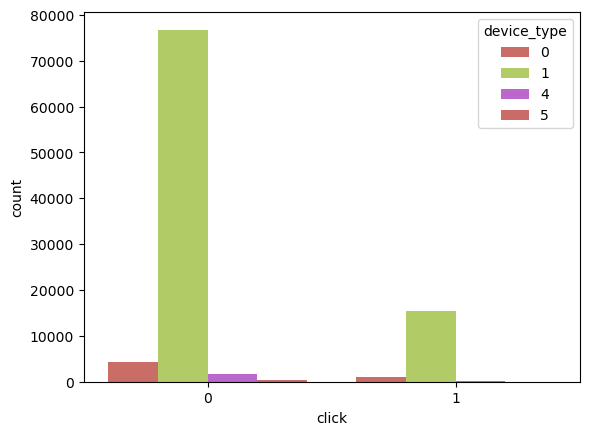

In [10]:
# sns.countplot(x='click',data=train,palette='hls')
sns.countplot(x='click', data=train, hue='device_type', palette='hls')
plt.show();

In [11]:
print(train.dtypes)  # Shows data types for all columns
print(train.head())  # Displays the first few rows of the dataset

id                          uint64
click                        int64
hour                datetime64[ns]
C1                           int64
banner_pos                   int64
site_id                     object
site_domain                 object
site_category               object
app_id                      object
app_domain                  object
app_category                object
device_id                   object
device_ip                   object
device_model                object
device_type                  int64
device_conn_type             int64
C14                          int64
C15                          int64
C16                          int64
C17                          int64
C18                          int64
C19                          int64
C20                          int64
C21                          int64
dtype: object
                     id  click       hour    C1  banner_pos   site_id  \
0  10023308754907120856      1 2014-10-21  1005           1  e151e245   


In [12]:
train['click'].value_counts() / len(train)

0    0.83224
1    0.16776
Name: click, dtype: float64

In [14]:
# train.hour.describe()
train.hour.describe(datetime_is_numeric=True)

count                           100000
mean     2014-10-25 22:27:26.063999744
min                2014-10-21 00:00:00
25%                2014-10-23 04:00:00
50%                2014-10-26 01:00:00
75%                2014-10-28 14:00:00
max                2014-10-30 23:00:00
Name: hour, dtype: object

Text(0.5, 1.0, 'Number of clicks per hour')

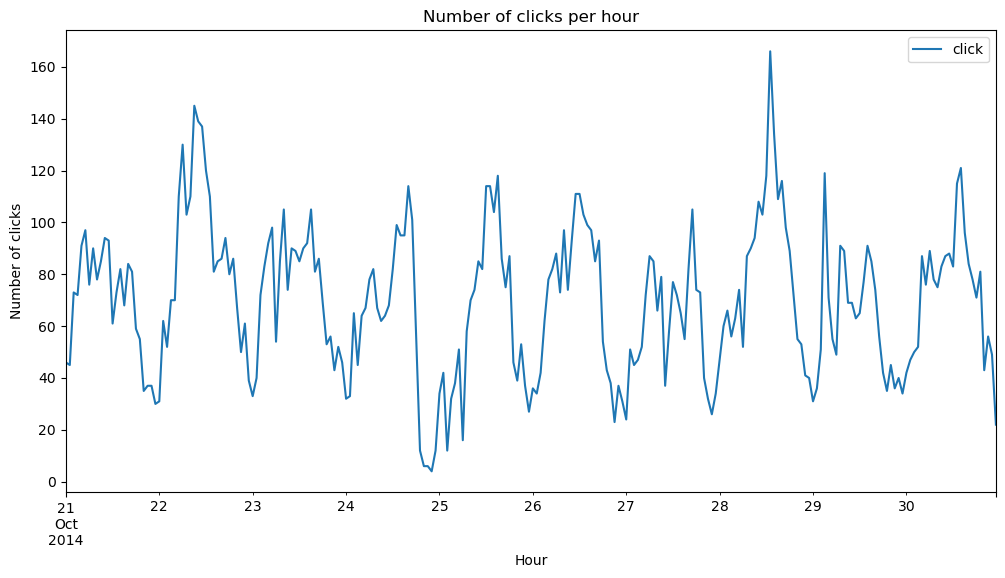

In [15]:
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
plt.xlabel('Hour')
plt.title('Number of clicks per hour')

Text(0.5, 1.0, 'Click Trends Hour of the Day')

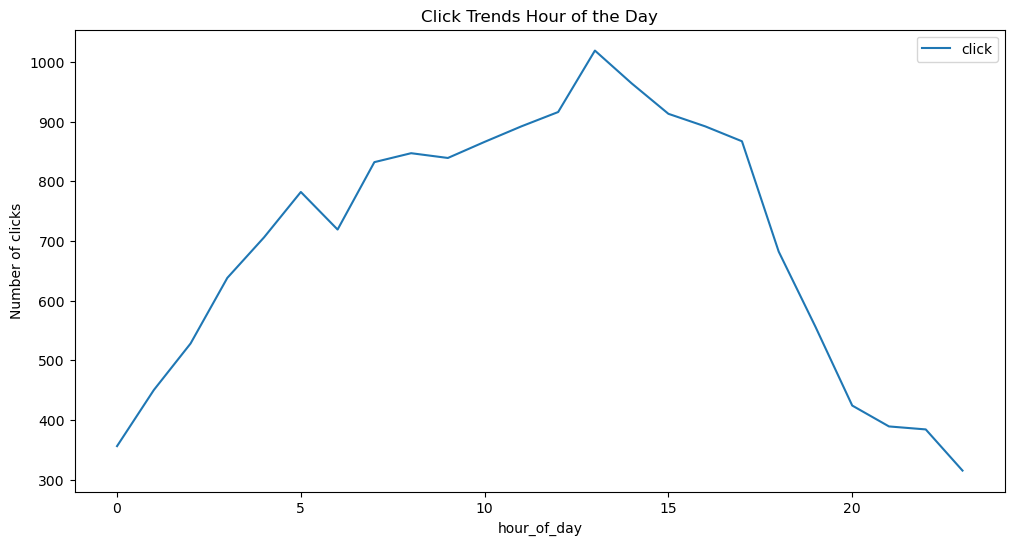

In [19]:
train['hour_of_day'] = train.hour.apply(lambda val: val.hour)
train.groupby('hour_of_day').agg({'click':'sum'}).plot(figsize=(12,6))
plt.ylabel('Number of clicks')
# plt.xlabel('Hour')
plt.title('Click Trends Hour of the Day')

Text(0.5, 1.0, 'Hourly impressions vs clicks')

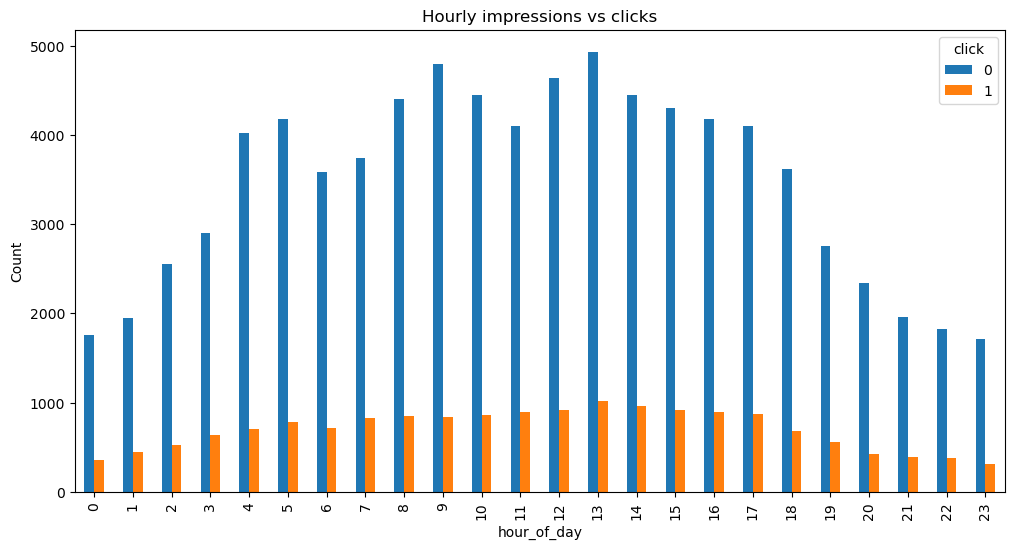

In [20]:
train.groupby(['hour_of_day', 'click']).size().unstack().plot(kind='bar', title="Hour of Day", figsize=(12,6))
plt.ylabel('Count')
plt.title('Hourly impressions vs clicks')